[ML0220, Задание 1] Зайнуллина Рената

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.alg = algorithm
        self.k = n_neighbors
    
    def fit(self, X, y):
        if (self.alg == 'brute'):
            self.x_pred = np.asarray(X)
        if (self.alg == 'kd_tree'):
            self.tree = KDTree(X)
        self.y_pred = np.asarray(y)
    
    def predict(self, X):
        if (self.alg == 'brute'):
            Y = np.empty(shape=[X.shape[0], self.k], dtype=self.y_pred.dtype)
            dist = np.empty(shape=[X.shape[0], self.x_pred.shape[0]])
            dist = scipy.spatial.distance.cdist(X, self.x_pred, metric='euclidean')
            Y = self.y_pred[np.argpartition(dist, self.k, axis = 1)[:, :self.k]]
            return scipy.stats.mode(Y, axis=1)[0].ravel()
        if (self.alg == 'kd_tree'):
            neighbors = self.tree.query(X, self.k, return_distance=False)
            return scipy.stats.mode(self.y_pred[neighbors], axis=1)[0].ravel()
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 474 µs, sys: 152 µs, total: 626 µs
Wall time: 582 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 15 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 1.86 ms, sys: 122 µs, total: 1.99 ms
Wall time: 3.05 ms


array([2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 2.42 ms, sys: 1.35 ms, total: 3.77 ms
Wall time: 13.7 ms


array([2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 871 µs, sys: 300 µs, total: 1.17 ms
Wall time: 1.11 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 214 µs, sys: 10 µs, total: 224 µs
Wall time: 502 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 2.02 ms, sys: 354 µs, total: 2.37 ms
Wall time: 2.57 ms


array([0, 0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 1.43 ms, sys: 218 µs, total: 1.64 ms
Wall time: 1.64 ms


array([0, 0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = datasets.fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']
target

array([7, 4, 4, ..., 3, 1, 8])

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
V = TfidfVectorizer(max_features=30).fit_transform(data).todense()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [24]:
knn = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')
knn.fit(V, target)
scores = cross_val_score(knn, V, target, cv=4)
scores

array([0.14810887, 0.13856486, 0.14321075, 0.14497878])

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [25]:
import matplotlib.pyplot as plt
import numpy as np

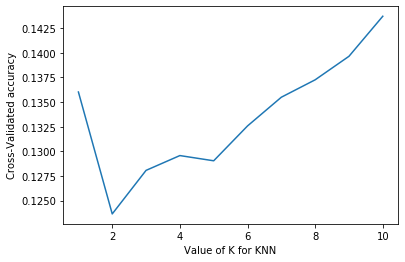

In [26]:
scr = np.zeros(10)
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn.fit(V, target)
    scr[k - 1] = cross_val_score(knn, V, target, cv=4).mean()
    
plt.plot(np.arange(1, 11), scr)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated accuracy')
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.
(Да что-то все они какие-то не очень, полагаю,  я что-то делаю не так, но не могу понять, что именно)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [27]:
newsgroups = datasets.fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? (Оно ниже) Попробуйте сделать выводы, почему отличается качество. (Да оно и изначально высоким не было)

In [28]:
test_data = newsgroups['data']
test_target = newsgroups['target']
test_V = TfidfVectorizer(max_features=30).fit_transform(test_data).todense()

knn = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree')
knn.fit(V, target)
knn.score(test_V, test_target)

0.11922464152947425